In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from  PIL import Image
import matplotlib.pyplot as plt

In [3]:
abs_path = "/home/aymeric/code/Aymeric-B/elle_ebene/raw_data/Type 3/F-0a4539ed022c8a6a608177787c35306c.jpg"
image = Image.open(abs_path)

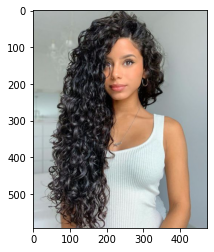

In [4]:
plt.imshow(image)

In [5]:
from elle_ebene.predict import Predict

In [6]:
predictor = Predict()
predictor.model_init(path="../../model_weights/seg_aug/weights")

In [7]:
from elle_ebene.utils.simple_preprocessing import resize_img, to_numpy_rgb, squared_imgs, normalize

In [8]:
clean_image = normalize(np.asarray(squared_imgs(to_numpy_rgb([resize_img(image, 224)]))))

In [9]:
clean_image.shape

(1, 224, 224, 3)

In [10]:
from elle_ebene.hair_segmentation.hair_seg import HairSegmenter

In [11]:

segmenter = HairSegmenter()
segmenter.model_init()

In [12]:
segmented_images = segmenter.get_hairs(clean_image)

In [13]:
segmented_images[0].shape

(224, 224, 3)

In [14]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [15]:
def initialize_model_1():
   
    model  = models.Sequential()
    
    ### First convolution & max-pooling
    model.add(layers.Conv2D(16, kernel_size=(4, 4), activation='relu', input_shape=(224, 224, 3), padding = "same"))
    #model.add(layers.Dropout(rate=0.2))
    
    ### Second convolution
    model.add(layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding = "same"))
    model.add(layers.MaxPool2D(pool_size = (4,4)))    
    #model.add(layers.Dropout(rate=0.2))
    
    ### Third convolution
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding = "same"))  
    #model.add(layers.Dropout(rate=0.2))
    
    ### Fourth convolution
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding = "same"))
    model.add(layers.MaxPool2D(pool_size = (4,4)))    
    #model.add(layers.Dropout(rate=0.2))
    
    ### Flattening
    model.add(layers.Flatten())
    
    ### One fully connected
    model.add(layers.Dense(32, activation='relu')) 
    #model.add(layers.Dropout(rate=0.4))

    ### Last layer
    model.add(layers.Dense(2, activation='sigmoid')) 

    model.compile(loss='binary_crossentropy',
            optimizer=optimizers.Adam(learning_rate = 0.001),
            metrics=['accuracy'])
    
    return model
    

In [16]:
model = initialize_model_1()

In [17]:
model.load_weights("/home/aymeric/code/Aymeric-B/elle_ebene/model_weights/seg_aug/weights")

In [21]:
np.asarray(segmented_images).shape

(1, 224, 224, 3)

In [22]:
model.predict(np.asarray(segmented_images))

array([[0., 1.]], dtype=float32)

In [23]:
predictor.predict(image)

1